In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("medical_examination.csv")
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [5]:
df["height"] = df["height"].astype(float) / 100
df["imc"] = df["weight"] / df["height"]**2 

df["overweight"] = (df["imc"] > 25).astype(int) # astype converte os valores True para 1 e False para 0.
    
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1.68,76.0,120,80,1,1,1,0,1,0,26.927438,1
69996,99995,22601,1,1.58,126.0,140,90,2,2,0,0,1,1,50.472681,1
69997,99996,19066,2,1.83,105.0,180,90,3,1,0,1,0,1,31.353579,1
69998,99998,22431,1,1.63,72.0,135,80,1,2,0,0,0,1,27.099251,1


Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [6]:
df["gluc"] = (df["gluc"] > 1 ).astype(int)
df["cholesterol"] = (df["cholesterol"] > 1).astype(int)

df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1.68,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,1.58,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,1.83,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,1.63,72.0,135,80,0,1,0,0,0,1,27.099251,1


Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.

In [51]:
df_cat = pd.melt(df,id_vars=["cardio"],value_vars=["cholesterol","gluc","smoke","alco","active","overweight"])
df_cat.columns = ["cardio","condition","value"]
print(df_cat)


        cardio    condition  value
0            0  cholesterol      0
1            1  cholesterol      1
2            1  cholesterol      1
3            1  cholesterol      0
4            0  cholesterol      0
...        ...          ...    ...
419995       0   overweight      1
419996       1   overweight      1
419997       1   overweight      1
419998       1   overweight      1
419999       0   overweight      0

[420000 rows x 3 columns]


Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

In [69]:
df_cat = df_cat.groupby(["cardio","condition","value"]).size().reset_index(name="total")
df_cat["cardio"] = df_cat["cardio"].astype(str)
df_cat["condition"] = df_cat["condition"].astype(str)
df_cat["value"] = df_cat["value"].astype(str)
print(df_cat)


   cardio    condition value  total
0       0       active     0   6378
1       0       active     1  28643
2       0         alco     0  33080
3       0         alco     1   1941
4       0  cholesterol     0  29330
5       0  cholesterol     1   5691
6       0         gluc     0  30894
7       0         gluc     1   4127
8       0   overweight     0  15915
9       0   overweight     1  19106
10      0        smoke     0  31781
11      0        smoke     1   3240
12      1       active     0   7361
13      1       active     1  27618
14      1         alco     0  33156
15      1         alco     1   1823
16      1  cholesterol     0  23055
17      1  cholesterol     1  11924
18      1         gluc     0  28585
19      1         gluc     1   6394
20      1   overweight     0  10539
21      1   overweight     1  24440
22      1        smoke     0  32050
23      1        smoke     1   2929


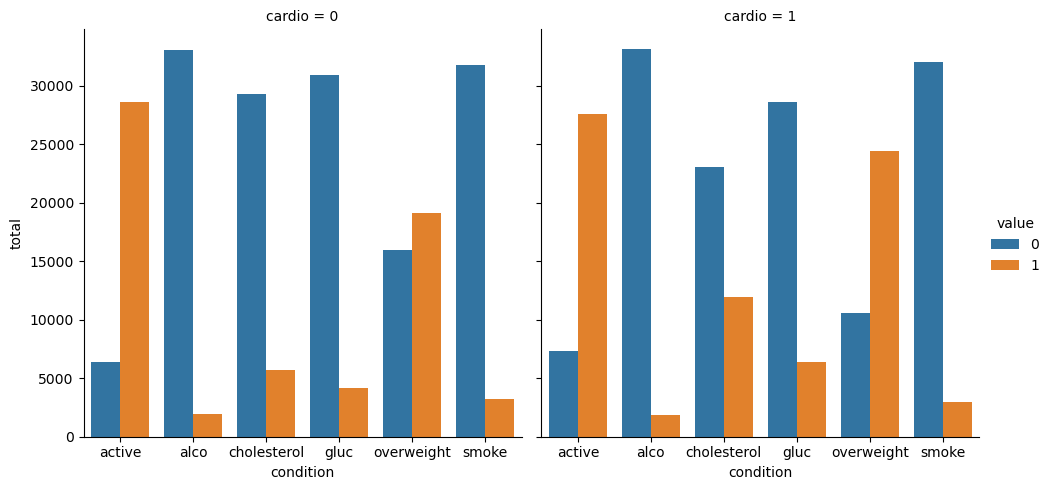

In [70]:
fig = sns.catplot(df_cat,x="condition",y="total",kind="bar",hue="value",col="cardio")
print(fig)

## HEATMAP

In [57]:
df_heat = df
df_heat = df.loc[(df_heat["ap_lo"] <= df_heat["ap_hi"]) &
            (df_heat["height"] >= df_heat["height"].quantile(0.025)) &
            (df_heat["height"] <= df_heat["height"].quantile(0.975)) &
            (df_heat["weight"] >= df_heat["weight"].quantile(0.025)) &
            (df_heat["weight"] <= df_heat["weight"].quantile(0.975))
            ]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,1.72,70.0,130,90,0,0,0,0,1,1,23.661439,0
69994,99992,21074,1,1.65,80.0,150,80,0,0,0,0,1,1,29.384757,1
69995,99993,19240,2,1.68,76.0,120,80,0,0,1,0,1,0,26.927438,1
69998,99998,22431,1,1.63,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [58]:
corr = df_heat.corr()
print(corr)

                   id       age       sex    height    weight     ap_hi  \
id           1.000000  0.004533  0.004761  0.001503 -0.002381 -0.000164   
age          0.004533  1.000000 -0.011243 -0.072657  0.071432  0.019478   
sex          0.004761 -0.011243  1.000000  0.472205  0.100852  0.005564   
height       0.001503 -0.072657  0.472205  1.000000  0.193134  0.005495   
weight      -0.002381  0.071432  0.100852  0.193134  1.000000  0.021899   
ap_hi       -0.000164  0.019478  0.005564  0.005495  0.021899  1.000000   
ap_lo        0.000295  0.151513  0.058829  0.004633  0.200519  0.078258   
cholesterol  0.003205  0.125129 -0.036690 -0.066834  0.127893  0.024237   
gluc         0.001742  0.087728 -0.023856 -0.037811  0.093289  0.009121   
smoke       -0.001970 -0.041407  0.334619  0.174388  0.051750 -0.001468   
alco        -0.003220 -0.027729  0.168984  0.080234  0.054904  0.001258   
active       0.007885 -0.011071  0.008947  0.002883 -0.007876  0.001406   
cardio       0.003364  0.

In [46]:
mask = np.triu(np.ones_like(corr, dtype=bool))


c:\Users\x07124886180\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


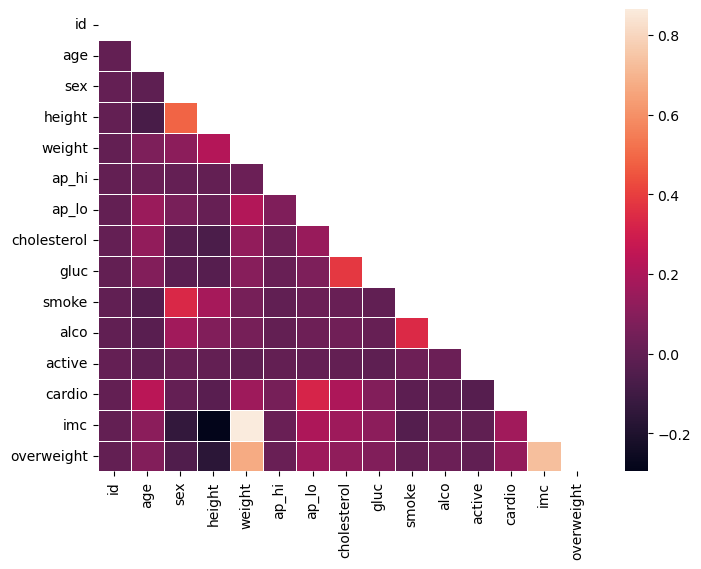

In [56]:
plt.figure(figsize=(8,6))
fig = sns.heatmap(corr,mask=mask,annot=True,linewidths=0.5)